In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from data_loader import load_images_and_labels

# Preprocessing and Feature Engineering Data

In [44]:
directory = "caltech-101/101_ObjectCategories"
img_height = 128
img_width = 128

images, labels, class_names = load_images_and_labels(directory, img_height, img_width)

In [45]:
images = images / 255.0 # normalize image color values from 0-255 to 0-1
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=123)
 
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Class Names: ['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ba

In [46]:
images[0]

array([[[0.34901962, 0.3372549 , 0.31764707],
        [0.37254903, 0.36078432, 0.34117648],
        [0.3529412 , 0.34117648, 0.32156864],
        ...,
        [0.5058824 , 0.5764706 , 0.49019608],
        [0.49803922, 0.5529412 , 0.4627451 ],
        [0.47843137, 0.5254902 , 0.44705883]],

       [[0.3372549 , 0.3254902 , 0.30588236],
        [0.34509805, 0.33333334, 0.3137255 ],
        [0.34901962, 0.3372549 , 0.31764707],
        ...,
        [0.4862745 , 0.5529412 , 0.47843137],
        [0.4745098 , 0.53333336, 0.4509804 ],
        [0.46666667, 0.5176471 , 0.44705883]],

       [[0.3372549 , 0.3254902 , 0.30588236],
        [0.34509805, 0.33333334, 0.3137255 ],
        [0.36078432, 0.34901962, 0.32941177],
        ...,
        [0.44313726, 0.50980395, 0.44705883],
        [0.43529412, 0.49411765, 0.41960785],
        [0.42745098, 0.47843137, 0.4117647 ]],

       ...,

       [[0.14117648, 0.13333334, 0.07450981],
        [0.1254902 , 0.11764706, 0.05882353],
        [0.12941177, 0

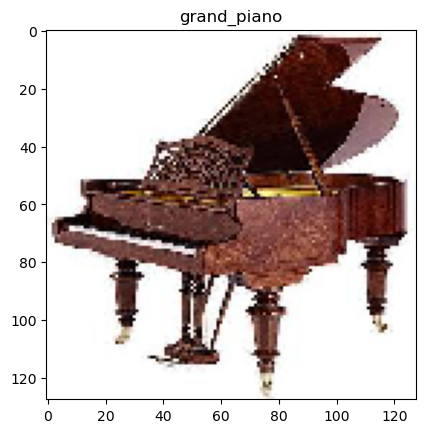

In [ ]:
# show a random image
index = random.randint(0, len(x_train))
plt.imshow(x_train[index])
plt.title(class_names[y_train[index]])
plt.show()

# CNN Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
        
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 57600)             0         
                                                                 
 dense_10 (Dense)            (None, 512)              

In [49]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
174/174 [==============================] - 31s 177ms/step - loss: 3.3292 - accuracy: 0.3285 - val_loss: 2.5715 - val_accuracy: 0.4500
Epoch 2/50
174/174 [==============================] - 31s 175ms/step - loss: 1.5786 - accuracy: 0.6387 - val_loss: 2.2359 - val_accuracy: 0.5248
Epoch 3/50
174/174 [==============================] - 32s 183ms/step - loss: 0.4810 - accuracy: 0.8806 - val_loss: 2.7686 - val_accuracy: 0.5284
Epoch 4/50
174/174 [==============================] - 31s 179ms/step - loss: 0.1262 - accuracy: 0.9757 - val_loss: 2.8753 - val_accuracy: 0.5544
Epoch 5/50
174/174 [==============================] - 31s 177ms/step - loss: 0.0787 - accuracy: 0.9849 - val_loss: 3.0799 - val_accuracy: 0.5277


In [51]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

55/55 [==============================] - 3s 47ms/step - loss: 2.1264 - accuracy: 0.5311
Test accuracy: 0.5311059951782227
